In [ ]:
# import libraries!

import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve, accuracy_score


In [ ]:
# retrieve the original train and test set

# training data
X_train = pd.read_csv('original/X_train')
y_train = pd.read_csv('original/y_train')
y_train = y_train['CAD']

# test data
X_test = pd.read_csv('original/X_test')
y_test = pd.read_csv('original/y_test')
y_test = y_test['CAD']

Undersample Train and Test Data:
<p>
Normalized version
</p>

In [ ]:
# retrieved undersample training set
X_train_us_nrm = pd.read_csv('undersample_normalized/X_undersample_resampled_encoded_finished_norm_scaled_finished')
y_train_us_nrm = pd.read_csv('undersample_normalized/y_X_undersample_resampled_encoded_finished_norm_scaled_finished')

# retrieve undersample test set
X_test_us_nrm = pd.read_csv('undersample_normalized/X_test_us_encoded_finished_norm_scaled_finished')
y_test_us_nrm = pd.read_csv('undersample_normalized/y_test_us_encoded_finished_norm_scaled_finished')
y_test_us_nrm = y_test_us_nrm['CAD']

Oversample Train and Test Data
<p>
Normalized Version
</p>

In [ ]:
# retrieved oversample training set
X_train_os_nrm = pd.read_csv('oversample_normalized/X_oversample_resampled_encoded_finished_norm_scaled_finished')
y_train_os_nrm = pd.read_csv('oversample_normalized/y_oversample_resampled_encoded_finished_norm_scaled_finished')

# retrieve oversample test set
X_test_os_nrm = pd.read_csv('oversample_normalized/X_test_os_encoded_finished_norm_scaled_finished')
y_test_os_nrm = pd.read_csv('oversample_normalized/y_test_os_encoded_finished_norm_scaled_finished')

Model 4: Logistic Regression

In [ ]:
def train_eval_plot(model, X_train, y_train, X_test, y_test, dataset_label):
    # Train the model
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)

    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy for {dataset_label} Data: {accuracy:.4f}")

    # Evaluation
    print(f"Classification Report for {dataset_label} Data:")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d")
    plt.title(f'Confusion Matrix for {dataset_label} Data')
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show()

    # ROC Curve
    y_pred_proba = model.predict_proba(X_test)[::,1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    auc_value = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{dataset_label}, auc="+str(auc_value))
    plt.legend(loc=4)
    plt.title(f'ROC Curve for {dataset_label} Data')
    plt.show()

    # Precision-Recall Curve
    precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
    plt.plot(recall, precision, marker='.')
    plt.title(f'Precision-Recall Curve for {dataset_label} Data')
    plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy for Undersampled Data: 0.7432
Classification Report for Undersampled Data:
              precision    recall  f1-score   support

           0       0.54      0.81      0.65       347
           1       0.90      0.72      0.80       833

    accuracy                           0.74      1180
   macro avg       0.72      0.76      0.72      1180
weighted avg       0.79      0.74      0.75      1180



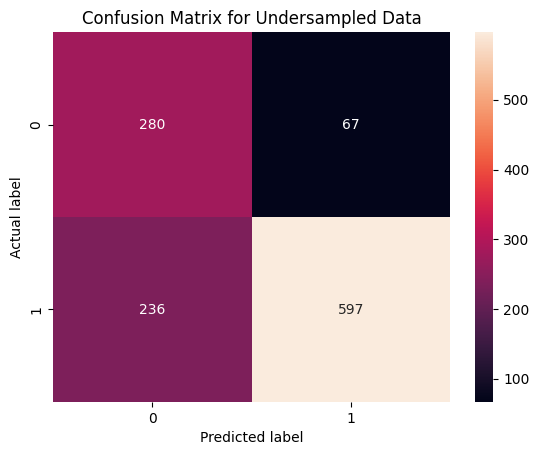

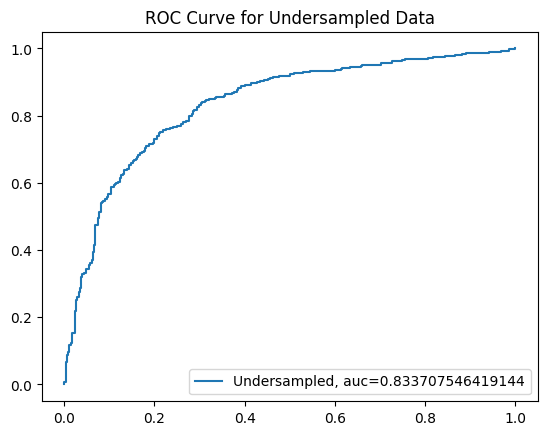

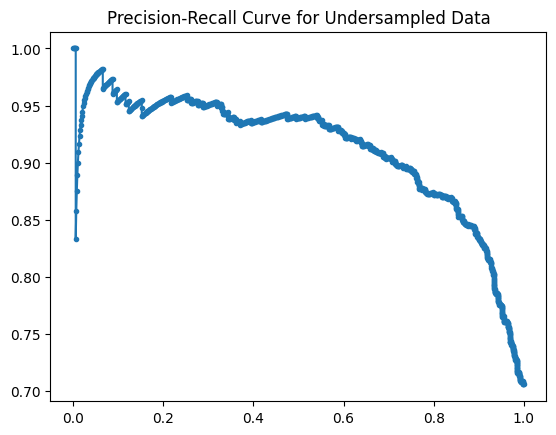

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy for Oversampled Data: 0.7695
Classification Report for Oversampled Data:
              precision    recall  f1-score   support

           0       0.59      0.70      0.64       347
           1       0.87      0.80      0.83       833

    accuracy                           0.77      1180
   macro avg       0.73      0.75      0.74      1180
weighted avg       0.78      0.77      0.77      1180



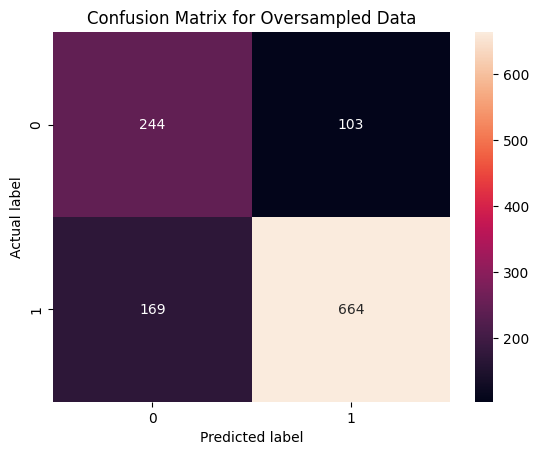

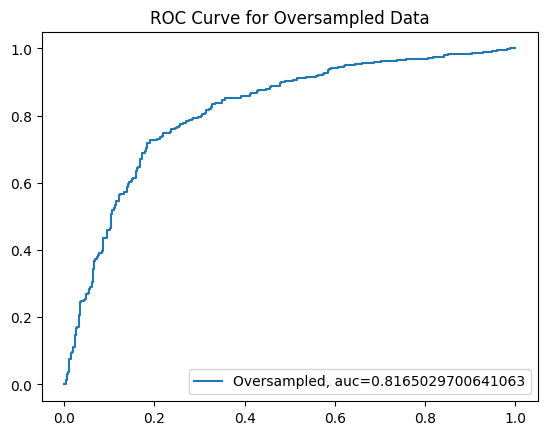

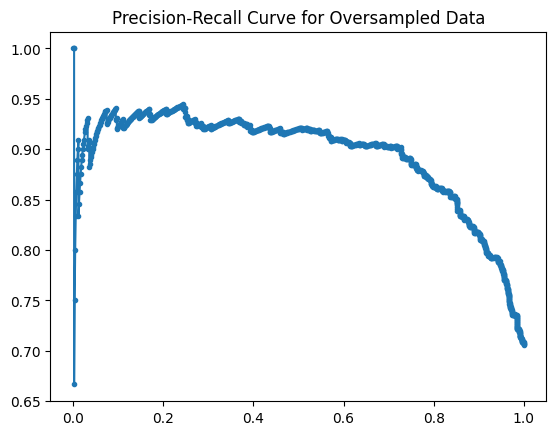

In [ ]:
# Undersampled data model
model_us = LogisticRegression()
train_eval_plot(model_us, X_train_us_nrm, y_train_us_nrm, X_test_us_nrm, y_test_us_nrm, "Undersampled")

# Oversampled data model
model_os = LogisticRegression()
# Replace these with your actual oversampled dataset variables
train_eval_plot(model_os, X_train_os_nrm, y_train_os_nrm, X_test_os_nrm, y_test_os_nrm, "Oversampled")

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Accuracy for Undersampled (Best Model) Data: 0.7475
Classification Report for Undersampled (Best Model) Data:
              precision    recall  f1-score   support

           0       0.55      0.81      0.65       347
           1       0.90      0.72      0.80       833

    accuracy                           0.75      1180
   macro avg       0.72      0.77      0.73      1180
weighted avg       0.80      0.75      0.76      1180



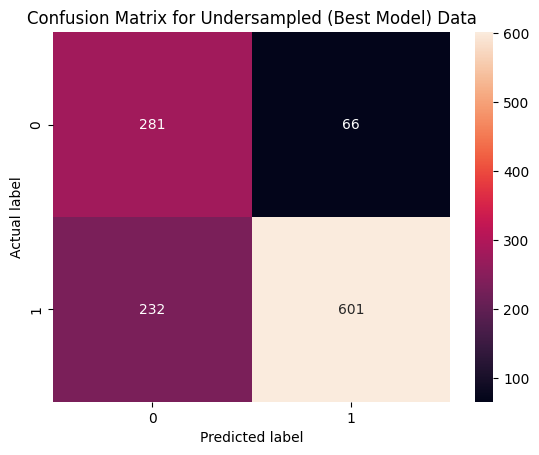

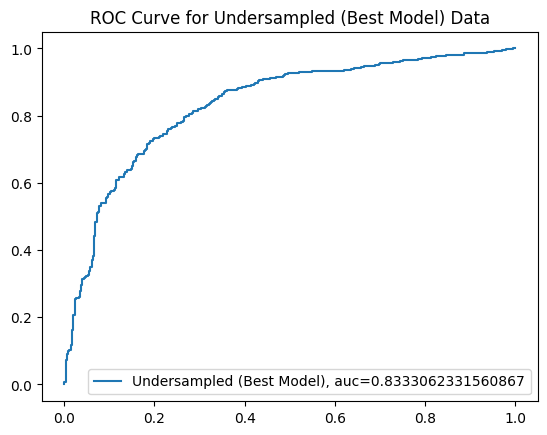

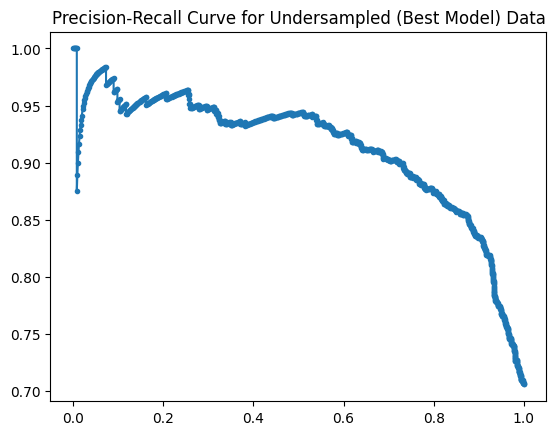

Best Parameters for Undersampled Data: {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Accuracy for Oversampled (Best Model) Data: 0.7746
Classification Report for Oversampled (Best Model) Data:
              precision    recall  f1-score   support

           0       0.60      0.71      0.65       347
           1       0.87      0.80      0.83       833

    accuracy                           0.77      1180
   macro avg       0.73      0.75      0.74      1180
weighted avg       0.79      0.77      0.78      1180



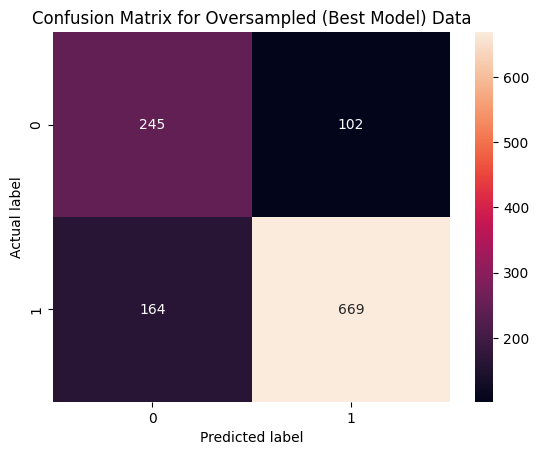

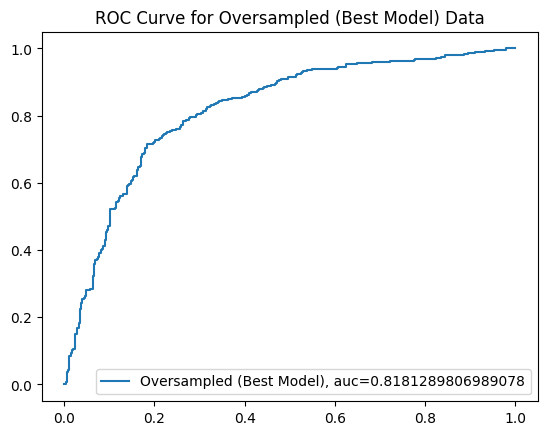

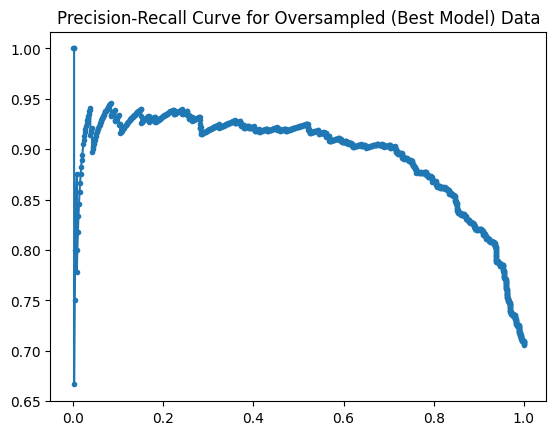

Best Parameters for Oversampled Data: {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

# GridSearch for undersampled data
grid_us = GridSearchCV(LogisticRegression(), param_grid, cv=5, verbose=0, scoring='accuracy')
grid_us.fit(X_train_us_nrm, y_train_us_nrm)

# Evaluate the best model from grid search
best_model_us = grid_us.best_estimator_
train_eval_plot(best_model_us, X_train_us_nrm, y_train_us_nrm, X_test_us_nrm, y_test_us_nrm, "Undersampled (Best Model)")
print("Best Parameters for Undersampled Data:", grid_us.best_params_)

# GridSearch for oversampled data
grid_os = GridSearchCV(LogisticRegression(), param_grid, cv=5, verbose=0, scoring='accuracy')
grid_os.fit(X_train_os_nrm, y_train_os_nrm)

# Evaluate the best model from grid search
best_model_os = grid_os.best_estimator_
train_eval_plot(best_model_os, X_train_os_nrm, y_train_os_nrm, X_test_os_nrm, y_test_os_nrm, "Oversampled (Best Model)")
print("Best Parameters for Oversampled Data:", grid_os.best_params_)


Model 5: Decision Tree



In [ ]:
# Function to train model, make predictions, evaluate, and plot graphs
def train_eval_plot(model, X_train, y_train, X_test, y_test, dataset_label):
    # Train the model
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)

    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy for {dataset_label} Data: {accuracy:.4f}")

    # Evaluation
    print(f"Classification Report for {dataset_label} Data:")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d")
    plt.title(f'Confusion Matrix for {dataset_label} Data')
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show()

    # ROC Curve
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    auc_value = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{dataset_label}, auc="+str(auc_value))
    plt.legend(loc=4)
    plt.show()

    # Precision-Recall Curve
    precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
    plt.plot(recall, precision, marker='.')
    plt.title(f'Precision-Recall Curve for {dataset_label} Data')
    plt.show()

Accuracy for Undersampled Data: 0.7364
Classification Report for Undersampled Data:
              precision    recall  f1-score   support

           0       0.54      0.76      0.63       347
           1       0.88      0.73      0.80       833

    accuracy                           0.74      1180
   macro avg       0.71      0.74      0.71      1180
weighted avg       0.78      0.74      0.75      1180



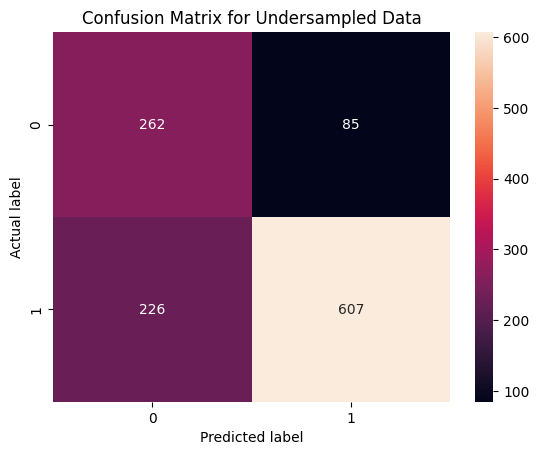

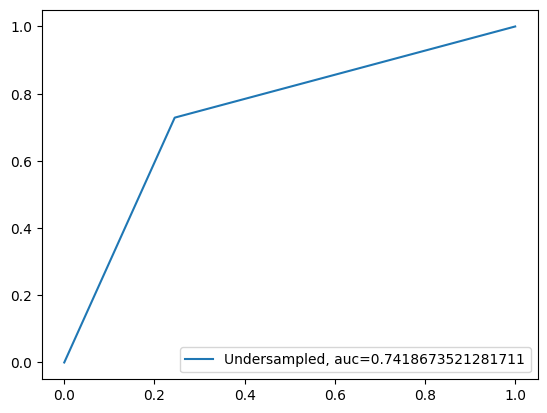

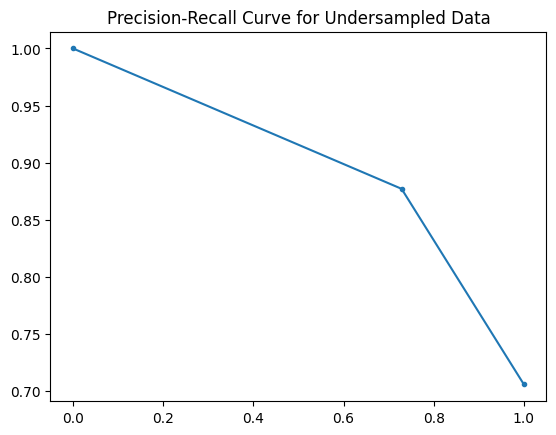

Accuracy for Oversampled Data: 0.7559
Classification Report for Oversampled Data:
              precision    recall  f1-score   support

           0       0.58      0.63      0.60       347
           1       0.84      0.81      0.82       833

    accuracy                           0.76      1180
   macro avg       0.71      0.72      0.71      1180
weighted avg       0.76      0.76      0.76      1180



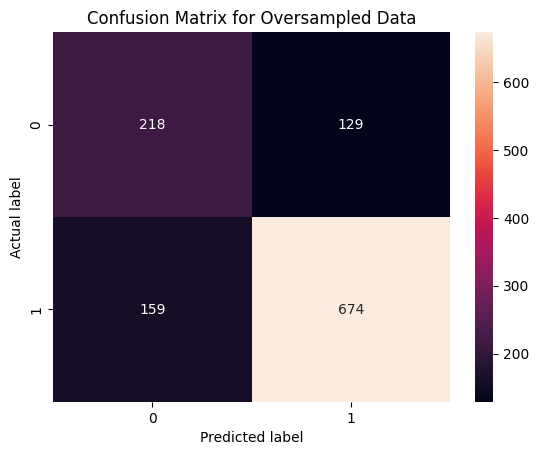

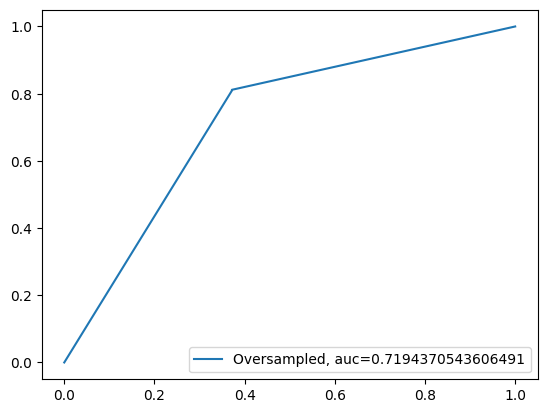

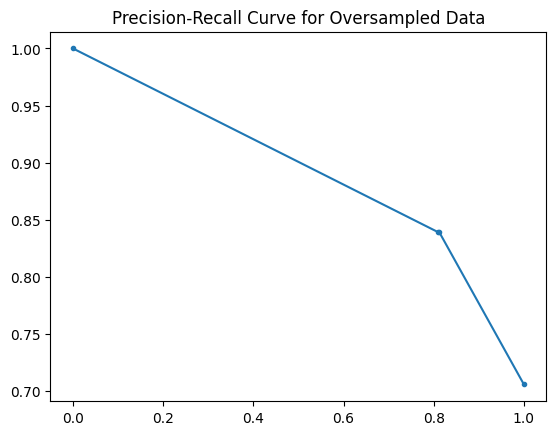

In [ ]:
# Undersampled data model
model_us = DecisionTreeClassifier()
train_eval_plot(model_us, X_train_us_nrm, y_train_us_nrm, X_test_us_nrm, y_test_us_nrm, "Undersampled")

# Oversampled data model
model_os = DecisionTreeClassifier()
# Replace these with your actual oversampled dataset variables
train_eval_plot(model_os, X_train_os_nrm, y_train_os_nrm, X_test_os_nrm, y_test_os_nrm, "Oversampled")


Fitting 5 folds for each of 216 candidates, totalling 1080 fits


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

Best Parameters for Undersampled Data: {'max_depth': 10, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 10}
Accuracy for Undersampled Data: 0.7415
Classification Report for Undersampled Data:
              precision    recall  f1-score   support

           0       0.54      0.80      0.65       347
           1       0.90      0.72      0.80       833

    accuracy                           0.74      1180
   macro avg       0.72      0.76      0.72      1180
weighted avg       0.79      0.74      0.75      1180



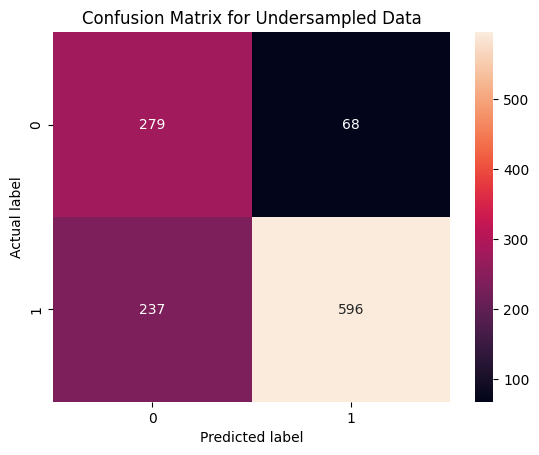

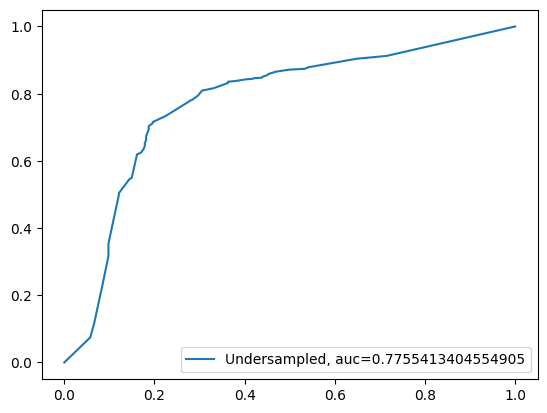

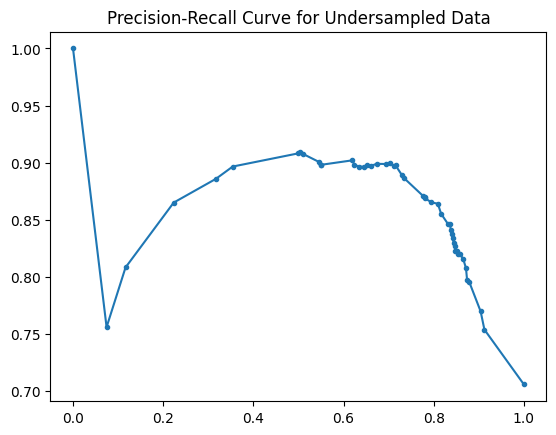

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

Best Parameters for Oversampled Data: {'max_depth': 20, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy for Oversampled Data: 0.7500
Classification Report for Oversampled Data:
              precision    recall  f1-score   support

           0       0.57      0.61      0.59       347
           1       0.83      0.81      0.82       833

    accuracy                           0.75      1180
   macro avg       0.70      0.71      0.70      1180
weighted avg       0.76      0.75      0.75      1180



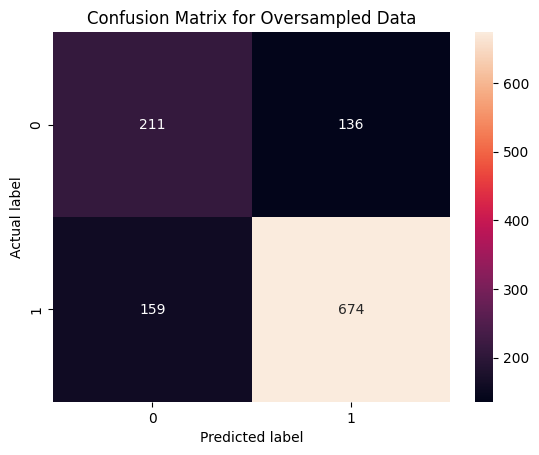

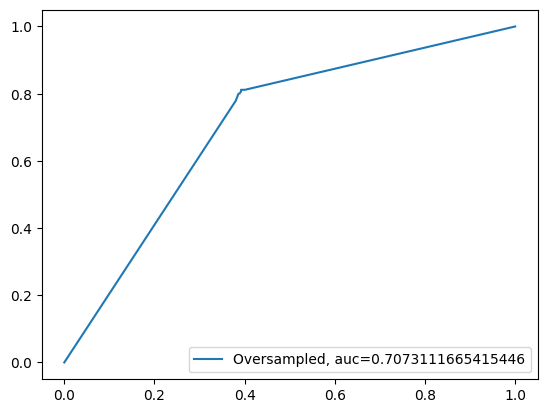

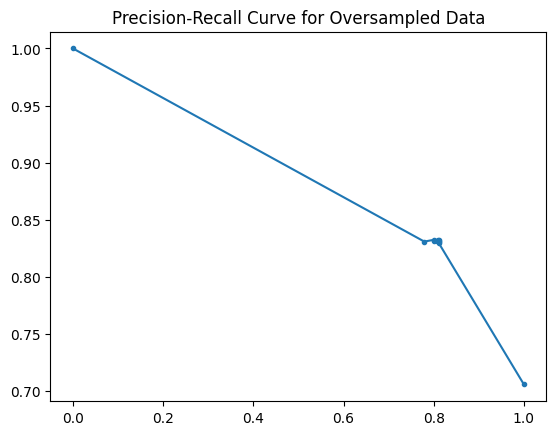

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define the parameter grid for Decision Tree
param_grid_dt = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2', None]
}

# Function to perform grid search and evaluate model
def grid_search_eval(X_train, y_train, X_test, y_test, dataset_label, param_grid):
    grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, verbose=1, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_
    print(f"Best Parameters for {dataset_label} Data: {grid_search.best_params_}")

    train_eval_plot(best_model, X_train, y_train, X_test, y_test, dataset_label)


# Grid search and evaluation for undersampled data
grid_search_eval(X_train_us_nrm, y_train_us_nrm, X_test_us_nrm, y_test_us_nrm, "Undersampled", param_grid_dt)

# Grid search and evaluation for oversampled data
grid_search_eval(X_train_os_nrm, y_train_os_nrm, X_test_os_nrm, y_test_os_nrm, "Oversampled", param_grid_dt)


Model 6: K-nearest neighbors

In [ ]:
# Function to train model, make predictions, evaluate, and plot graphs for KNN
def train_eval_plot_knn(model, X_train, y_train, X_test, y_test, dataset_label):
    # Train the model
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)

    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy for {dataset_label} Data: {accuracy:.4f}")

    # Evaluation
    print(f"Classification Report for {dataset_label} Data:")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d")
    plt.title(f'Confusion Matrix for {dataset_label} Data')
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show()

    # ROC Curve
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    auc_value = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{dataset_label}, auc="+str(auc_value))
    plt.legend(loc=4)
    plt.title(f'ROC Curve for {dataset_label} Data')
    plt.show()

    # Precision-Recall Curve
    precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
    plt.plot(recall, precision, marker='.')
    plt.title(f'Precision-Recall Curve for {dataset_label} Data')
    plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy for Undersampled Data: 0.7415
Classification Report for Undersampled Data:
              precision    recall  f1-score   support

           0       0.55      0.72      0.62       347
           1       0.87      0.75      0.80       833

    accuracy                           0.74      1180
   macro avg       0.71      0.74      0.71      1180
weighted avg       0.77      0.74      0.75      1180



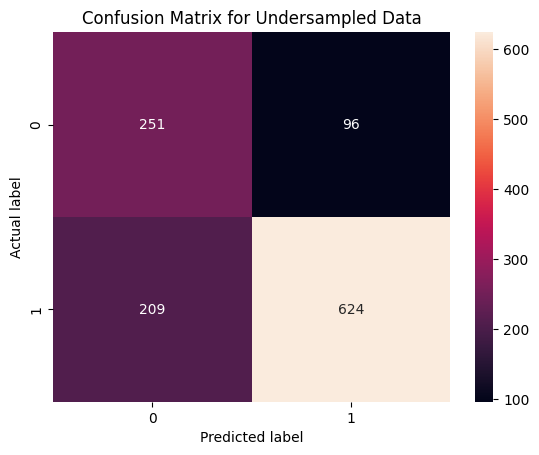

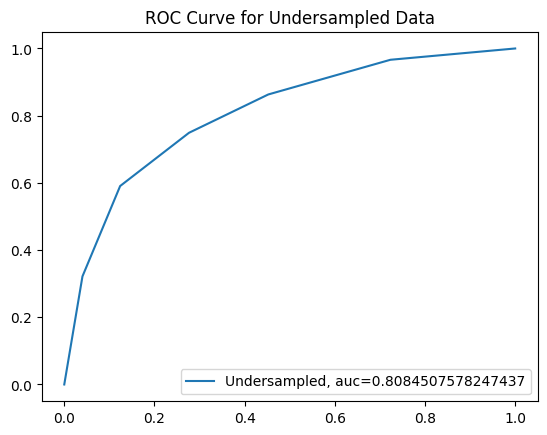

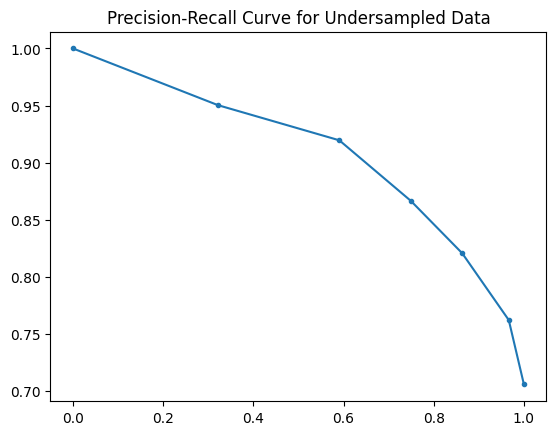

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy for Oversampled Data: 0.7686
Classification Report for Oversampled Data:
              precision    recall  f1-score   support

           0       0.61      0.60      0.60       347
           1       0.83      0.84      0.84       833

    accuracy                           0.77      1180
   macro avg       0.72      0.72      0.72      1180
weighted avg       0.77      0.77      0.77      1180



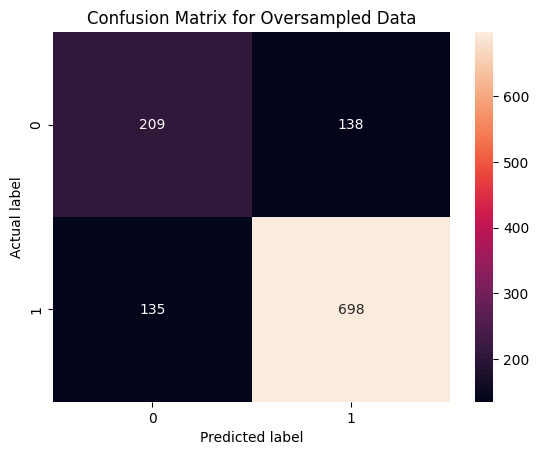

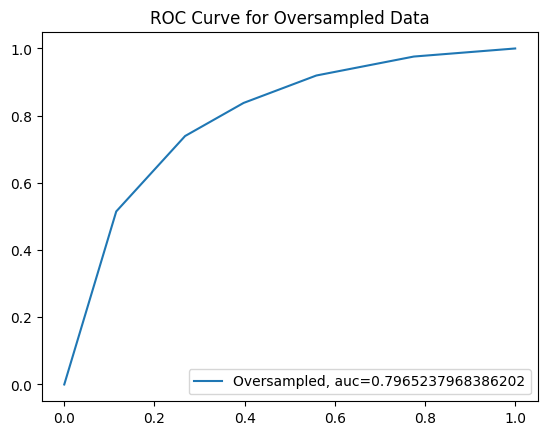

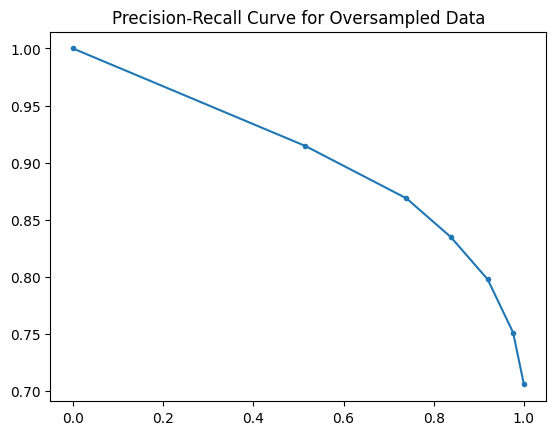

In [ ]:
# Example usage with KNN model for undersampled data
knn_model_us = KNeighborsClassifier()
train_eval_plot_knn(knn_model_us, X_train_us_nrm, y_train_us_nrm, X_test_us_nrm, y_test_us_nrm, "Undersampled")

# Example usage with KNN model for oversampled data
knn_model_os = KNeighborsClassifier()
train_eval_plot_knn(knn_model_os, X_train_os_nrm, y_train_os_nrm, X_test_os_nrm, y_test_os_nrm, "Oversampled")

Fitting 5 folds for each of 42 candidates, totalling 210 fits


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

Best Parameters for Undersampled Data: {'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'distance'}
Accuracy for Undersampled Data: 0.7754
Classification Report for Undersampled Data:
              precision    recall  f1-score   support

           0       0.59      0.77      0.67       347
           1       0.89      0.78      0.83       833

    accuracy                           0.78      1180
   macro avg       0.74      0.77      0.75      1180
weighted avg       0.80      0.78      0.78      1180



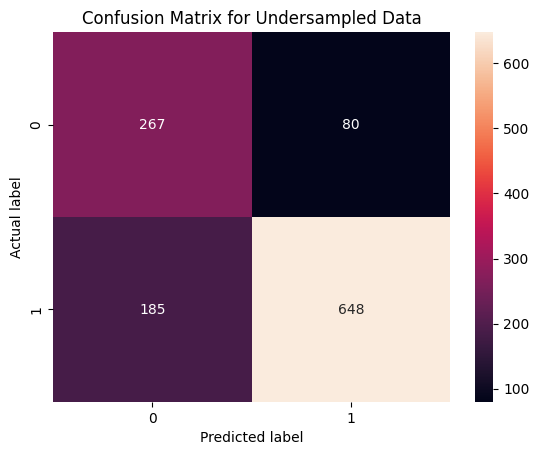

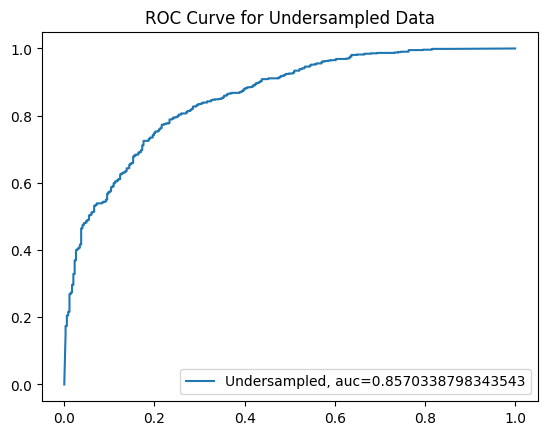

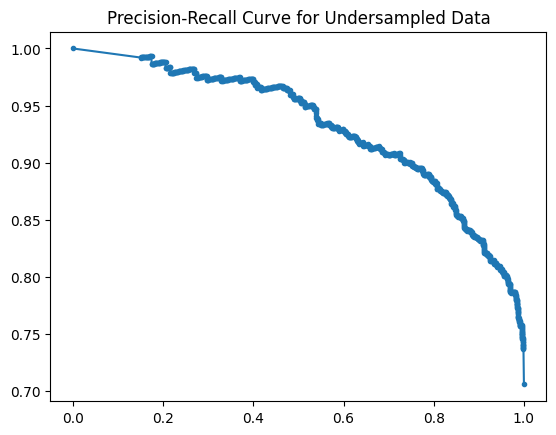

Fitting 5 folds for each of 42 candidates, totalling 210 fits


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

Best Parameters for Oversampled Data: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}
Accuracy for Oversampled Data: 0.7941
Classification Report for Oversampled Data:
              precision    recall  f1-score   support

           0       0.65      0.64      0.65       347
           1       0.85      0.86      0.85       833

    accuracy                           0.79      1180
   macro avg       0.75      0.75      0.75      1180
weighted avg       0.79      0.79      0.79      1180



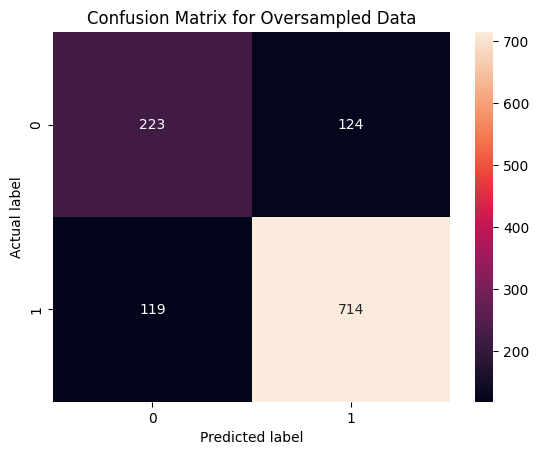

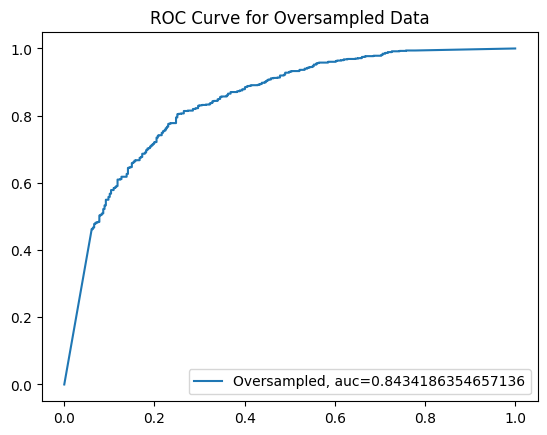

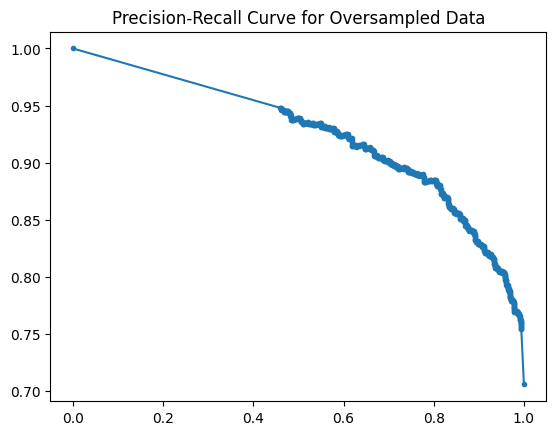

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Define the parameter grid for KNN
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Function to perform grid search and evaluate model for KNN
def grid_search_eval_knn(X_train, y_train, X_test, y_test, dataset_label, param_grid):
    grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, verbose=1, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_
    print(f"Best Parameters for {dataset_label} Data: {grid_search.best_params_}")

    train_eval_plot_knn(best_model, X_train, y_train, X_test, y_test, dataset_label)

# Grid search and evaluation for undersampled data
grid_search_eval_knn(X_train_us_nrm, y_train_us_nrm, X_test_us_nrm, y_test_us_nrm, "Undersampled", param_grid_knn)

# Grid search and evaluation for oversampled data
grid_search_eval_knn(X_train_os_nrm, y_train_os_nrm, X_test_os_nrm, y_test_os_nrm, "Oversampled", param_grid_knn)
